Autor: ÁLLIFE LICIO LACERDA

# Machine Learning - Regressão linear

### Fonte dos dados:
https://www.kaggle.com/srolka/ecommerce-customers

Uma empresa, que vende roupas online e também oferece serviços de consultoria em estilo e vestuário, quer decidir se deve concentrar seus esforços em um aplicativo móvel ou em seu site.<br>
Com base nos dados disponíveis, vamos estudar o melhor caminho que a empresa deveria seguir.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Ecommerce_data.csv")

# Análise exploratória

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.rename(columns={'Address':"Endereço",
         'Avg. Session Length':'Média Duração da Sessão',
         'Time on App':'Tempo no aplicativo',
          'Time on Website':'Tempo no site',
          'Length of Membership':'Duração da Associação',
          'Yearly Amount Spent':'Valor anual gasto'}, inplace = True)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Média Duração da Sessão,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Tempo no aplicativo,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Tempo no site,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Duração da Associação,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Valor anual gasto,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


# Visualizando correlações

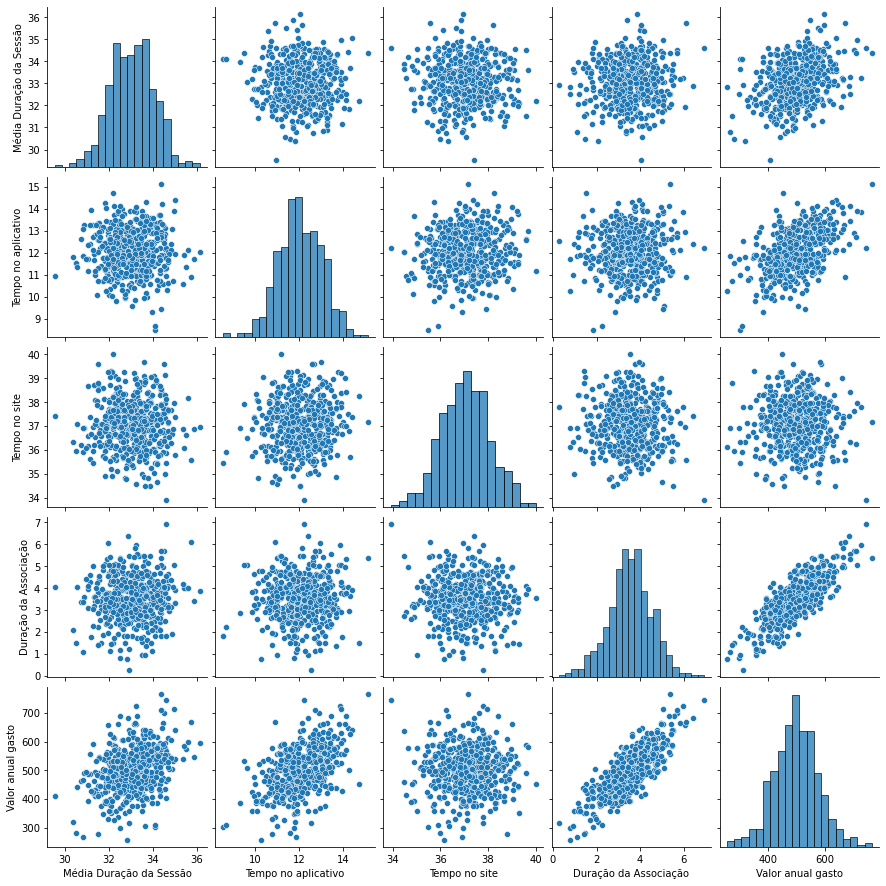

In [9]:
sns.pairplot(df)

<AxesSubplot:>

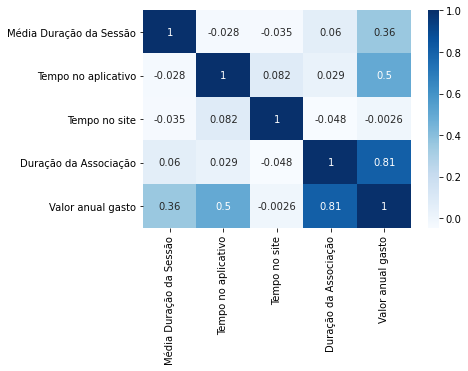

In [11]:
sns.heatmap(df.corr(), annot=True,cmap ='Blues')

## Podemos visualizar algumas correlações, por ex:
* Valor anual gasto x Duração de Associação (forte)
* Valor anual gasto x Tempo no aplicativo (leve)

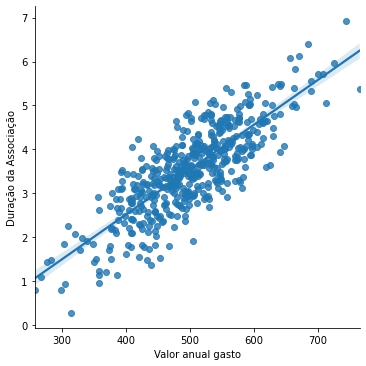

In [10]:
sns.lmplot(x='Valor anual gasto', y='Duração da Associação', data = df)

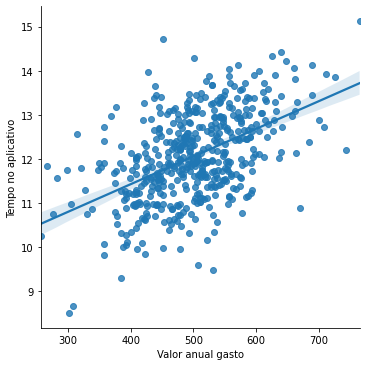

In [12]:
sns.lmplot(x='Valor anual gasto', y='Tempo no aplicativo', data = df)

# Criando Modelo de Regressão Linear

In [13]:
df.columns

Index(['Email', 'Endereço', 'Avatar', 'Média Duração da Sessão',
       'Tempo no aplicativo', 'Tempo no site', 'Duração da Associação',
       'Valor anual gasto'],
      dtype='object')

## Separando os dados de entrada e de saída

In [14]:
X = df[['Média Duração da Sessão','Tempo no aplicativo','Tempo no site','Duração da Associação']]

In [15]:
y = df[['Valor anual gasto']]

In [16]:
X.head()

,Média Duração da Sessão,Tempo no aplicativo,Tempo no site,Duração da Associação
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [17]:
y.head()

,Valor anual gasto
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 4), (150, 4), (350, 1), (150, 1))

# Criando nosso modelo de Regressão Linear

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
modelo = LinearRegression()

In [26]:
modelo.fit(X_train, y_train)

LinearRegression()

In [27]:
modelo.coef_

array([[25.22841233, 38.60020444,  0.35521156, 61.30550414]])

# Predição

In [28]:
pred = modelo.predict(X_test)

### Visualizar nossos dados de teste x dados preditos

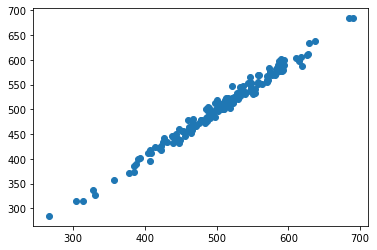

In [29]:
plt.scatter(x=y_test, y = pred)
plt.xlabel = ('y test')
plt.ylabel = ('y predito')

## Avaliando modelo

In [30]:
from sklearn import metrics

In [31]:
print('MAE = ', metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE =  7.6856345861454916
Mean Squared Error =  89.31918542006102
Root Mean Squared Error =  9.450882785224934


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

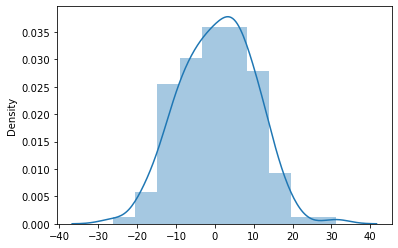

In [32]:
sns.distplot(y_test-pred,bins=10)

In [47]:
modelo.coef_

array([[25.22841233, 38.60020444,  0.35521156, 61.30550414]])

In [48]:
X.columns

Index(['Média Duração da Sessão', 'Tempo no aplicativo', 'Tempo no site',
       'Duração da Associação'],
      dtype='object')

In [67]:
l1 = X.columns.to_list()
l2 = modelo.coef_.tolist()[0]

In [74]:
for a,b in zip(l1,l2):
    print(str(a) + ':\t' + str(b))

Média Duração da Sessão:	25.22841233470614
Tempo no aplicativo:	38.60020443768928
Tempo no site:	0.35521156362494666
Duração da Associação:	61.30550413515722


# Conclusão
## O tempo no aplicativo é mais relevante do que o tempo no site.
## Mais relevante ainda, é a duração da associação do cliente, ou seja, quanto mais fidelizado o cliente, melhor o faturamento da empresa.